In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
logins = pd.read_json('logins.json', orient='columns')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.set_index('login_time', inplace=True)
logins['count'] = 1
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [4]:
# aggregated counts by 15 minute periods
logins15 = logins.resample('15Min').sum()
logins15 = logins15.fillna(0)
logins15.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


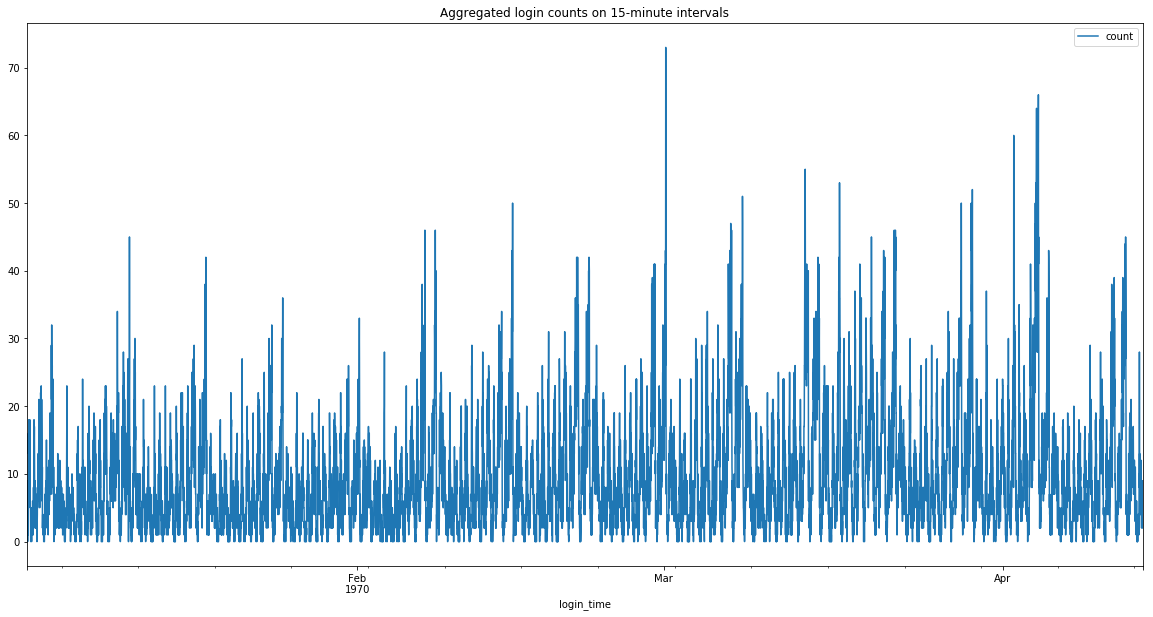

In [70]:
logins15.plot(figsize=(20,10), title='Aggregated login counts on 15-minute intervals')

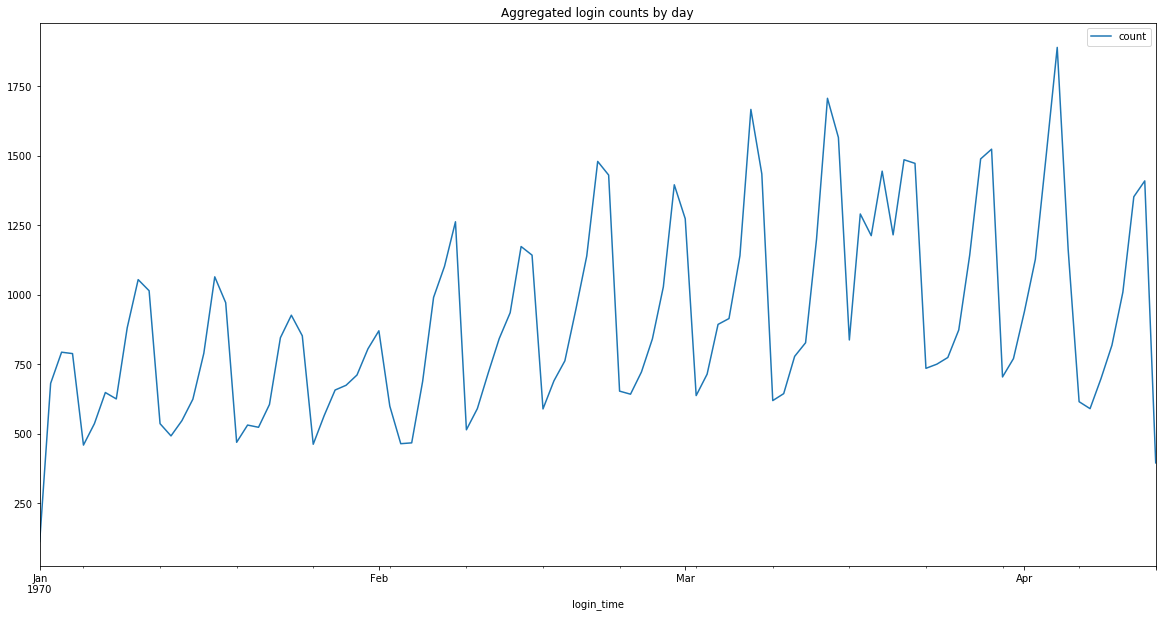

In [71]:
# by day
logins_byday = logins.resample('D').sum()
logins_byday = logins_byday.fillna(0)
logins_byday.plot(figsize=(20,10), title='Aggregated login counts by day')

In [75]:
# by weekday
logins_byweekday = logins.groupby(logins.index.weekday).size()
logins_byweekday.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
logins_byweekday

Sunday        8823
Monday        9268
Tuesday      10339
Wednesday    11960
Thursday     15208
Friday       19377
Saturday     18167
dtype: int64

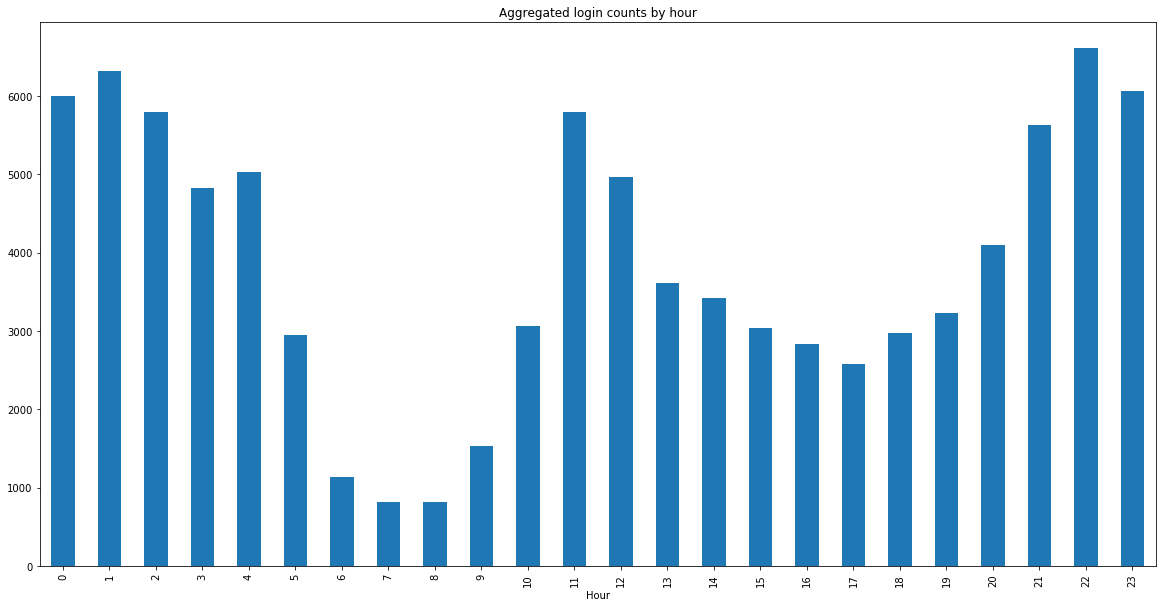

In [82]:
# by hour
logins_byhour = logins.groupby(logins.index.hour).size()
logins_byhour.index = np.arange(0,24)
logins_byhour.plot(kind='bar', figsize=(20,10), title='Aggregated login counts by hour')
plt.xlabel('Hour')

In [ ]:
# Friday and Saturday are the two days with the most logins, typically.  During the hours of 6-8 AM, logins are low; volume...
# ...picks up after 8 and peaks at 11 AM, then dips and picks up again around 9 PM.